# Aula 03 - Exercício 02

# Alunos

* Alexandre Batistella Bellas, 9763168
* Moisés Botarro Ferraz Silva, 8504135

## Aproximação de funções (Regressão)

Para esse exercício, carregue a base de dados `teste1.txt`. Os dados possuem 14 variáveis, organizados em 14 colunas. A 15ª coluna representa o valor da função. Os dados estão separados pelo caractere `\t`.


Note que os dados não podem ser lidos linha a linha, pois existem linhas que foram quebradas antes das 14 variáveis serem descritas.

* Leia os dados e armazene-os em uma tabela.
  * Dica: Converta sua tabela em uma estrutura do tipo pandas.DataFrame





In [1]:
import pandas as pd

table = []
labels = []

with open('test1.txt', 'r') as file:
    lines = file.readlines()
    
    labels = lines[0].strip('%\n').split('\t') 
    
    table.append([])
    for line in lines:    
        if line[0] == '%' or line[0] == '\n':
            continue
            
        if len(table[-1]) == 15:
            table.append([])
            
        cleaned = line.strip()
        values = list(map(float, cleaned.split('\t')))
        
        table[-1] = table[-1] + values
                 
    
df = pd.DataFrame.from_records(table, columns=labels)
df

,VL,VM,VP,M,VMVL,VMVM,VMVP,VMM,T,H,Vv,DirV,MHE,MLR,CO
0,1849.0,209.0,62.0,245.0,11.75,13.43,7.83,15.67,32.5,48.0,1.15,115.0,4.01,30.18,7.1
1,580.0,48.0,88.0,137.0,8.60,8.60,7.20,10.70,29.9,42.0,1.40,20.0,17.69,13.70,5.9
2,1438.0,207.0,108.0,386.0,11.80,9.40,8.60,13.40,37.1,28.0,0.60,170.0,3.49,38.37,9.6
3,651.0,58.0,23.0,46.0,9.60,13.70,13.70,12.00,15.7,64.0,0.00,159.0,5.33,32.97,7.4
4,623.0,55.0,82.0,141.0,5.10,4.50,6.60,7.80,27.4,46.0,0.70,27.0,17.69,13.70,3.7
5,408.0,39.0,3.0,98.0,7.20,7.20,5.80,10.30,31.0,49.0,0.40,72.0,22.47,10.52,3.8
6,908.0,99.0,29.0,347.0,7.20,9.40,7.20,10.40,32.8,42.0,0.80,176.0,6.08,8.00,12.1
7,908.0,30.0,112.0,73.0,9.60,9.60,8.60,10.70,32.4,35.0,0.60,130.0,17.69,13.70,3.9
8,1369.0,159.0,125.0,380.0,11.80,9.40,8.60,13.40,35.1,29.0,0.40,65.0,3.49,38.37,6.5
9,306.0,48.0,104.0,96.0,7.90,9.40,6.30,9.40,16.6,61.0,1.10,144.0,20.61,8.73,7.9




---

*   Calcule a matriz de correlação dos dados e escolha a variável mais relevante.
  
* Dica 1: Se os dados estiverem em formato de DataFrame da biblioteca pandas, basta fazer dataset.corr() para gerar a matriz de correlação. Para facilitar ainda mais a visualização, você pode utilizar a função heatmap da biblioteca seaborn, passando o parâmetro a matriz de correlação calculada e `annot=True` para exibir os valores no heatmap.
* Dica 2: Se o heatmap estiver muito pequeno, é possível alterar o tamanho padrão das figuras do matplotlib, através do comando `plt.rcParams['figure.figsize'] = [w, h]`, onde` [w, h]` é a largura/altura da imagem respectivamente (um tamanho bom para leitura é 10 e 5)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

corr = df.corr()
print("Matriz de Correlação")
corr

Matriz de Correlação


,VL,VM,VP,M,VMVL,VMVM,VMVP,VMM,T,H,Vv,DirV,MHE,MLR,CO
VL,1.000000,0.892725,0.125460,0.635456,0.526624,0.513067,0.146868,0.214022,0.100064,-0.272900,0.088457,0.053796,-0.777918,0.723154,0.502977
VM,0.892725,1.000000,0.173197,0.755762,0.570628,0.461671,0.187972,0.244904,0.127280,-0.247497,0.091559,0.051279,-0.748258,0.580923,0.487798
VP,0.125460,0.173197,1.000000,0.290346,0.145463,0.237025,-0.072337,0.065337,-0.127909,-0.016518,0.071989,-0.108532,0.099173,0.167538,0.128315
M,0.635456,0.755762,0.290346,1.000000,0.340981,0.163238,0.086327,0.050439,0.148949,-0.236621,0.088813,0.030351,-0.549199,0.336996,0.473371
VMVL,0.526624,0.570628,0.145463,0.340981,1.000000,0.646706,0.573290,0.475098,-0.030667,0.024296,0.167326,0.178110,-0.437975,0.433483,0.120988
VMVM,0.513067,0.461671,0.237025,0.163238,0.646706,1.000000,0.417954,0.480419,-0.080685,-0.008356,0.086886,0.122674,-0.319680,0.429569,0.140266
VMVP,0.146868,0.187972,-0.072337,0.086327,0.573290,0.417954,1.000000,0.271917,-0.163228,0.236470,-0.015558,0.115968,-0.258726,0.310415,-0.075075
VMM,0.214022,0.244904,0.065337,0.050439,0.475098,0.480419,0.271917,1.000000,0.092431,-0.022014,0.151788,0.145420,-0.037793,0.101333,-0.080647
T,0.100064,0.127280,-0.127909,0.148949,-0.030667,-0.080685,-0.163228,0.092431,1.000000,-0.700285,0.234546,-0.023968,0.016668,0.010254,-0.173339
H,-0.272900,-0.247497,-0.016518,-0.236621,0.024296,-0.008356,0.236470,-0.022014,-0.700285,1.000000,-0.136870,0.026560,0.169766,-0.159789,-0.168376


Heatmap


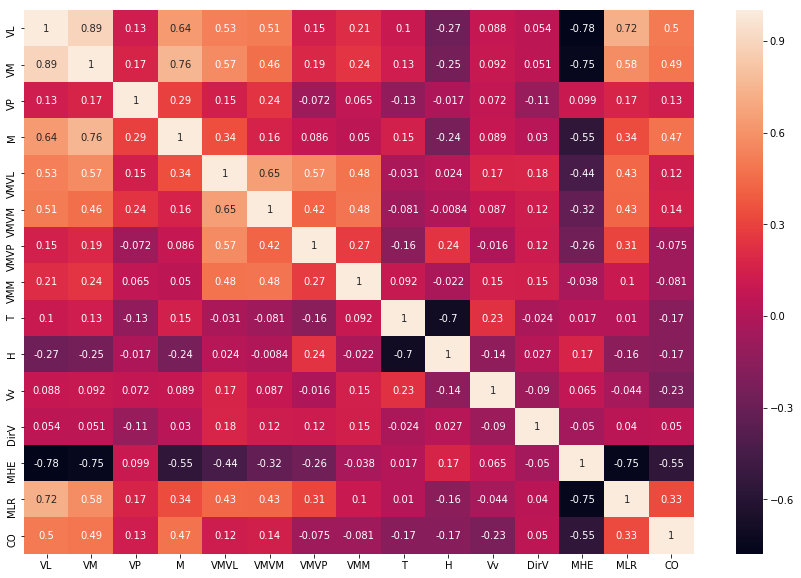

In [5]:
print("Heatmap")
sns.heatmap(corr, annot=True)

Dado a heatmap acima, escolhemos a variável **MHE** para fazer a Regressão Linear. Ela foi escolhida pois é o atributo que apresenta maior correlação, em módulo, com a saída **CO**. 



---



*   Com base na variáveis escolhida via matriz de correlação, aproxime a função por uma reta e calcule seu erro quadrático médio

* Dica 1: Utilize os pacotes importados para realizar a aproximação por função linear e para calcular o erro quadrático médio. 
* Dica 2: Para criar um novo conjunto com as variáveis selecionadas,  inicialize um `DataFrame()` do pandas passando como parâmetro as colunas do DataFrame original concatenadas com a função `_c` da biblioteca numpy: 

```python
pandas.DataFrame(numpy.c_[dataSet['Variavel 1'], dataSet['Variavel 2']], columns = ['Variavel 1', 'Variavel 2'])
```





-------- Linear Regression between MHE and CO --------
Erro Quadrático Médio: 5.97
R2: 0.31


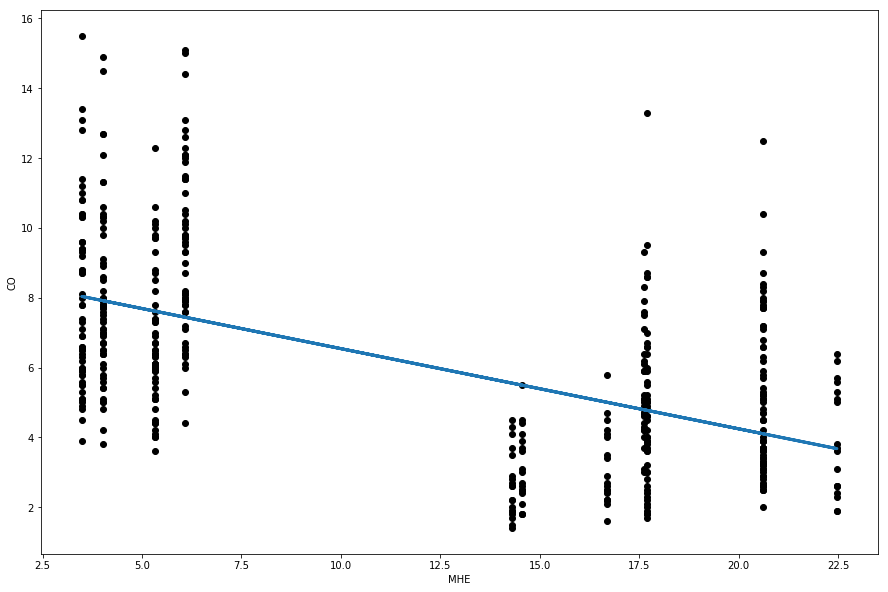

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression(var):
    print("-------- Linear Regression between %s and CO --------" % var)
    variables = pd.DataFrame(np.c_[df[var], df['CO']], columns=[var, 'CO'])

    x = variables[var].values.reshape((-1,1))
    y = variables['CO'].values.reshape((-1,1))

    # Criação de uma Regressão Linear
    regr = LinearRegression()
    regr.fit(x, y)

    plt.plot(x, regr.predict(x), linewidth=3)
    plt.scatter(x, y, color='black')
    plt.xticks()
    plt.xlabel(var)
    plt.yticks()
    plt.ylabel("CO")


    # Erro Quadrático
    print("Erro Quadrático Médio: %.2f" % mean_squared_error(y, regr.predict(x)))
    print("R2: %.2f" % r2_score(y, regr.predict(x)))
    
linear_regression('MHE')

Observando o scatter plot de MHExCO, verifica-se que não há uma relação unívoca entre MHE e CO. Para um mesmo valor de MHE, existem vários valores de CO associados. Dessa forma, CO = f(MHE) não parece uma boa relação para tomarmos como função alvo. 

Utilizaremos a variável com o segundo maior valor de correlação com **CO**, ou seja, **VL**.

-------- Linear Regression between VL and CO --------
Erro Quadrático Médio: 6.44
R2: 0.25


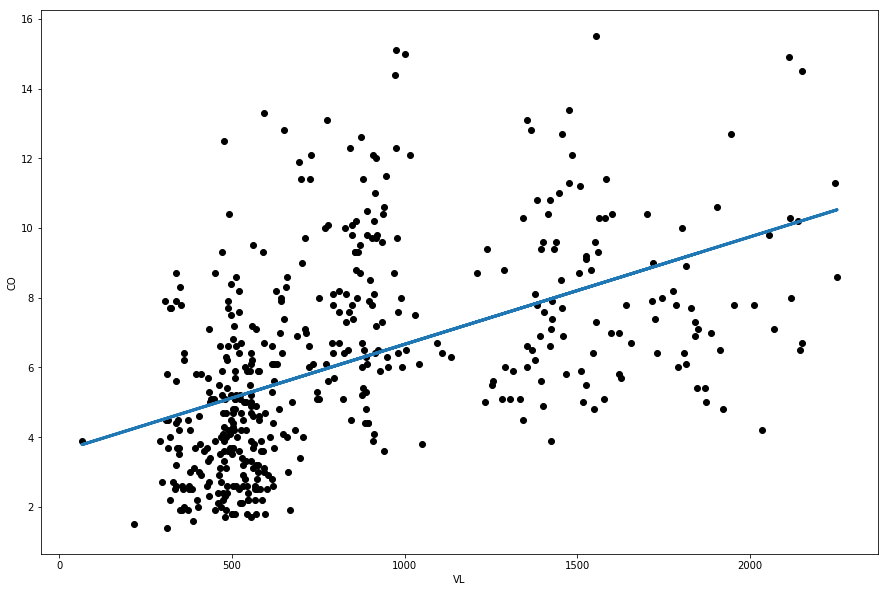

In [8]:
linear_regression('VL')



---



*  Agora calcule uma aproximação por uma função quadrática. Verifique qual produz o menor erro quadrático médio: a aproximação via função linear ou via função quadrática

  * Dica: Utilize a biblioteca já importada para *transformar* os dados para uma regressão polinomial (func. quadrática). Mais informações sobre como o processo podem ser encontradas dentro da pasta do projeto.



-------- 2 Degree Regression between VL and CO --------
Erro Quadrático Médio: 5.90


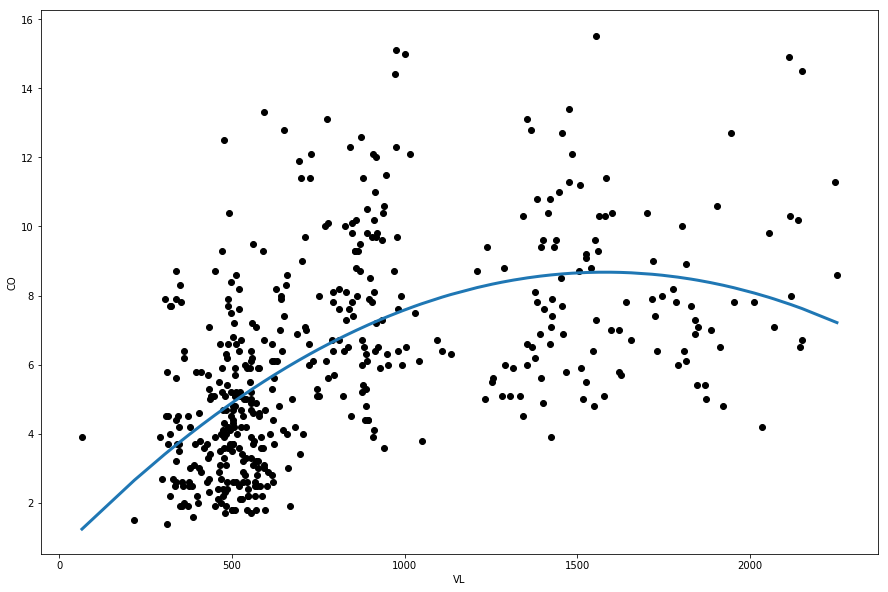

In [9]:
from sklearn.preprocessing import PolynomialFeatures

def regression(var, degree):
    print("-------- %d Degree Regression between %s and CO --------" % (degree,var))
    x = df[var].values.reshape(-1,1)
    y = df['CO'].values.reshape(-1,1)

    p = PolynomialFeatures(degree)
    x_transf = p.fit_transform(x)

    regr = LinearRegression()
    regr.fit(x_transf, y)

    # Ordena os valores de (x, y predito) segundo o valor de x para plotar o gráfico
    tuples = []
    for Xi, Yi in zip(x, regr.predict(x_transf)):
        tuples.append((Xi[0], Yi[0]))
    tuples.sort(key=lambda x: x[0])    

    plt.plot([t[0] for t in tuples], [t[1] for t in tuples], linewidth=3)
    plt.scatter(x, y, color='black')
    plt.xticks()
    plt.xlabel(var)
    plt.yticks()
    plt.ylabel("CO")

    # Erro Quadrático
    print("Erro Quadrático Médio: %.2f" % mean_squared_error(y, regr.predict(x_transf)))
    
regression('VL', 2)

O Erro Quadrático Médio produzido pela aproximação quadrática (5.90) foi menor que aquele produzido pela aproximação linear (6.44) para a variável VL.



---



*   Por fim, calcule uma aproximação por uma função cúbica. Verifique qual produz o menor erro quadrático médio: a aproximação via função linear, via função quadrática ou via função cúbica.


-------- 3 Degree Regression between VL and CO --------
Erro Quadrático Médio: 5.82


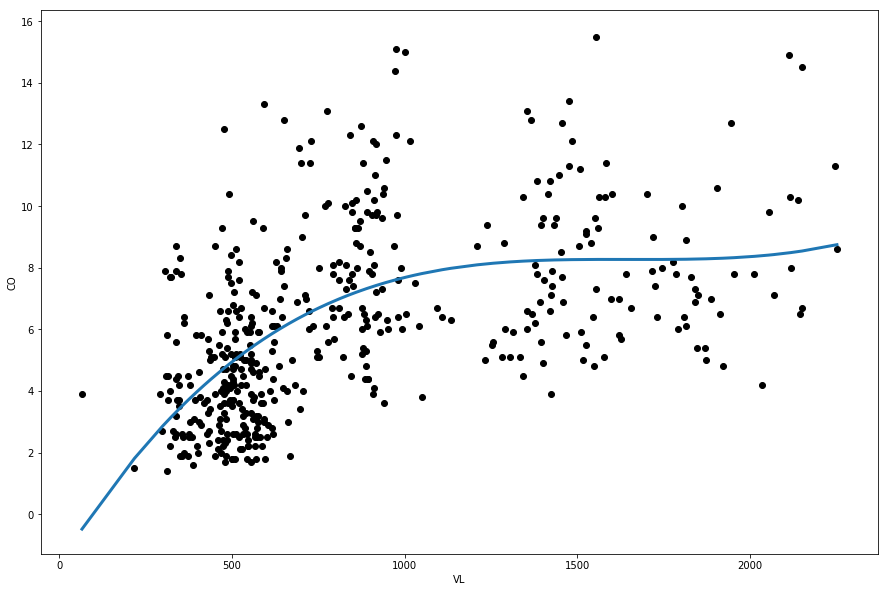

In [10]:
regression('VL', 3)

Após cálculo do erro quadrático médio, obtemos os seguintes resultados:
* Linear: 6.44
* Quadrática: 5.90
* Cúbica: 5.82

O erro quadrático médio produzido pela aproximação através de uma função cúbica foi o menor encontrado entre as 3 regressões. Isso pode ser explicado pelo maior grau de liberdade desta última uma vez que temos 4 coeficientes à determinar, contra 3 e 2 das aproximações quadrática e linear, respectivamente.

Entretanto, realizando o mesmo experimento para graus maiores, observa-se que após um determinado limite, há um aumento no valor do erro quadrático médio.

-------- 4 Degree Regression between VL and CO --------
Erro Quadrático Médio: 5.57


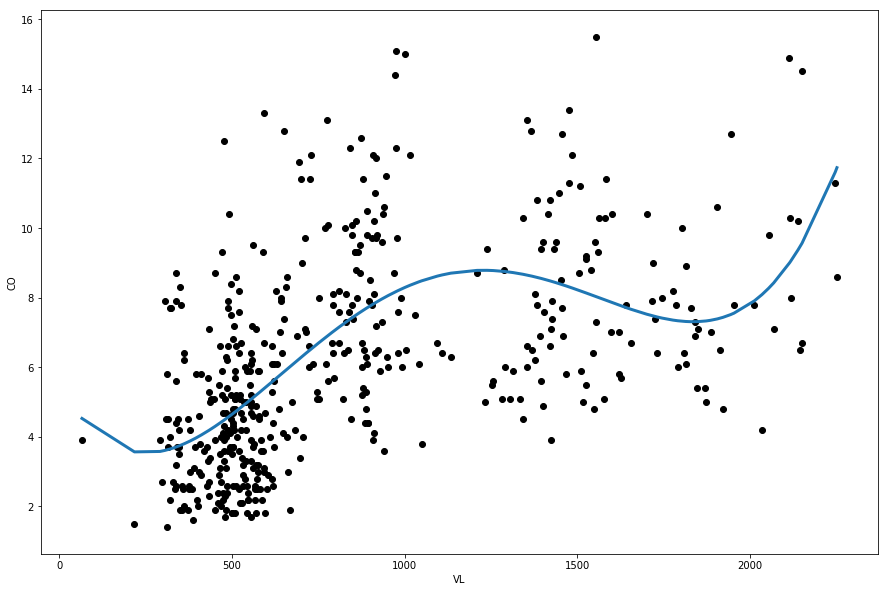

In [11]:
regression('VL', 4)

-------- 5 Degree Regression between VL and CO --------
Erro Quadrático Médio: 5.54


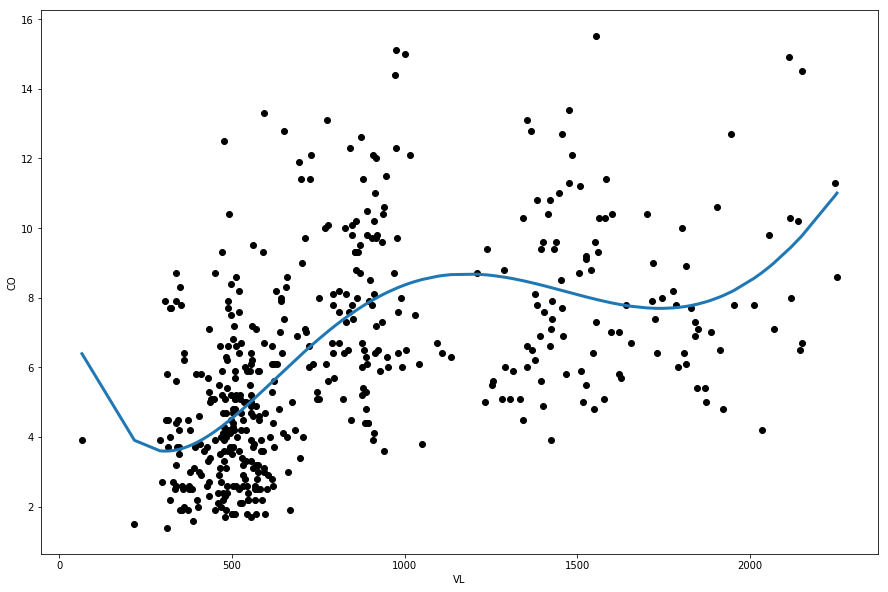

In [12]:
regression('VL', 5)

-------- 6 Degree Regression between VL and CO --------
Erro Quadrático Médio: 5.54


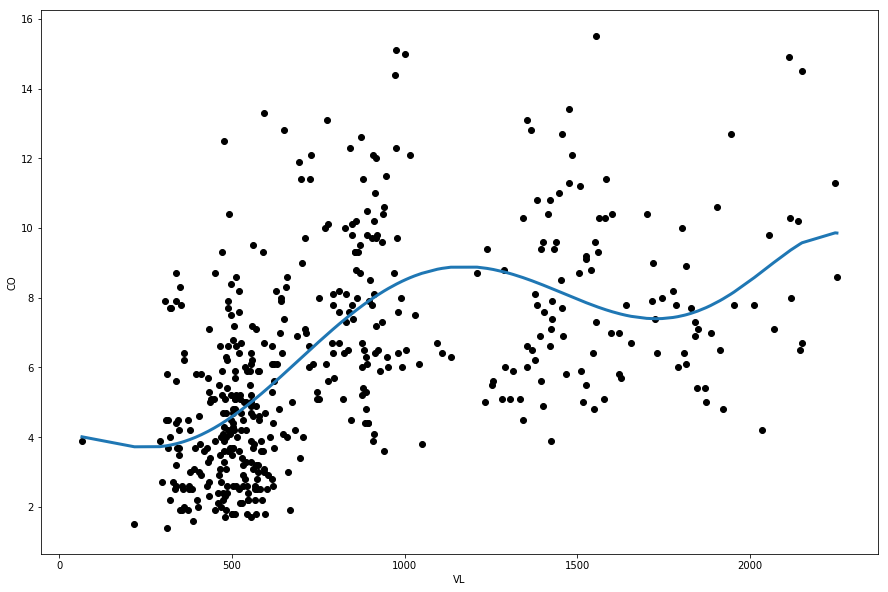

In [13]:
regression('VL', 6)

-------- 7 Degree Regression between VL and CO --------
Erro Quadrático Médio: 5.60


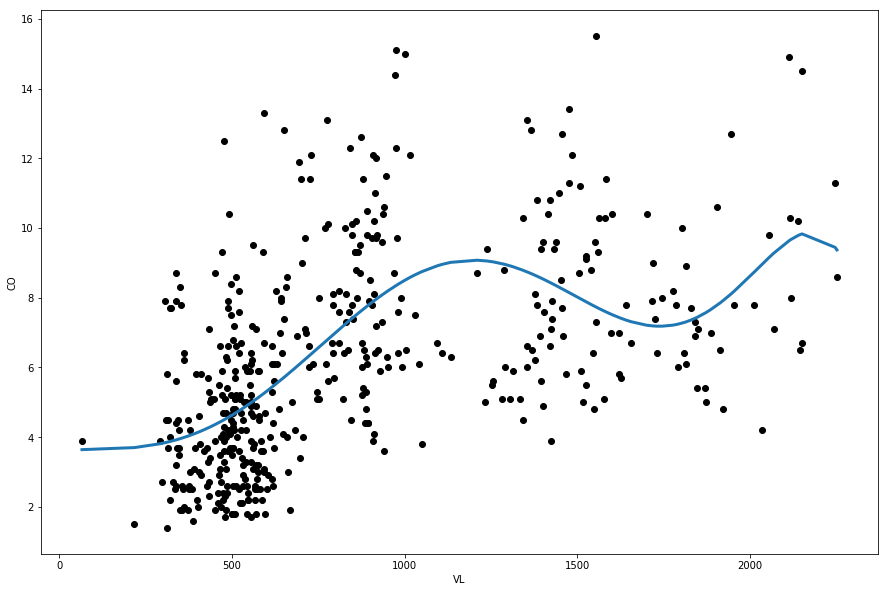

In [14]:
regression('VL', 7)